<a href="https://colab.research.google.com/github/37khalil/SVM-Implementation/blob/main/Car_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# import itertools

# plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits import mplot3d
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Comansant par un cas parfait pour le demantration de la separation lineaire

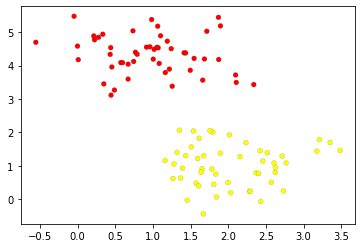

In [43]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn', linewidth=.1, edgecolors='black')

In [49]:
def plot_svc_decision_function(model, X=X, y=y, ax=None, plot_support=True):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn', linewidth=.1, edgecolors='black')
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=125, linewidth=1, c='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def train_linear_SVM(X=X, y=y, c=1):
    model = SVC(kernel='linear', C=c)
    model.fit(X, y)
    
    plot_svc_decision_function(model, X, y)
    return model

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]


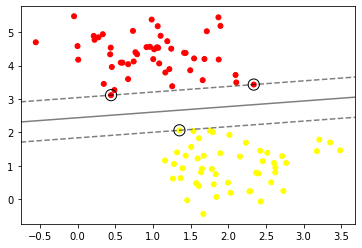

In [5]:
linear_model = train_linear_SVM(X, y)
print(linear_model.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.2       ]
 [1.35139348 2.06383637]
 [1.53853211 2.04370263]]


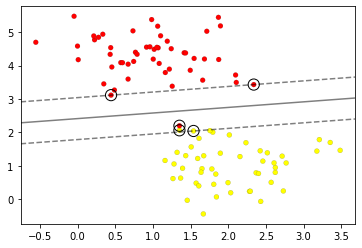

In [69]:
# X = np.append(X, [[1.35139348, 2.2]], axis=0)
# y = np.append(y, 0)

linear_model = train_linear_SVM(X, y, c=)
print(linear_model.support_vectors_)

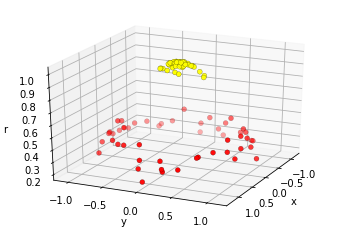

In [38]:
X, y = make_circles(100, factor=.1, noise=.1)

# la fonction du noyaux RBF
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=25, azim=25, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=25, cmap='autumn', linewidth=.2,edgecolors='black')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

In [34]:
clf = SVC(kernel='rbf', C=1E6, gamma=0.1)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

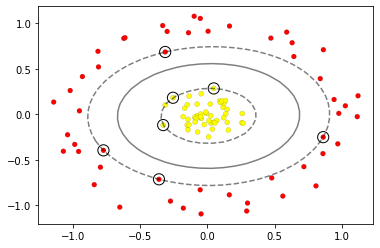

In [36]:
plot_svc_decision_function(clf)
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
#             s=300, lw=1, facecolors='none');

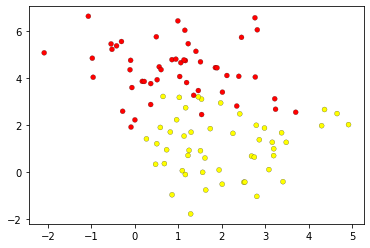

In [40]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn', linewidth=.2, edgecolors='black')